<a href="https://colab.research.google.com/github/PabRubio/pytorch-model/blob/main/model_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CNN Model Demo by Pablo R.

Saving chikon.jpg to chikon.jpg


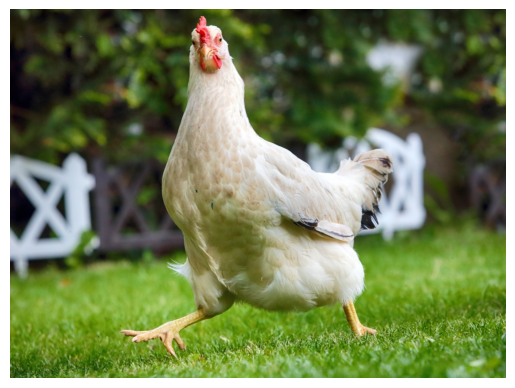

Predicted:  chicken


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from PIL import Image
from google.colab import files


class Net(nn.Module):
    """ Models a simple Convolutional Neural Network """

    def __init__(self):
        """ Initialize the network """
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        """ The forward propagation algorithm """
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
PATH = './chicken_net.pth'

file = files.upload()
if not file:
    print("No file uploaded. Please upload an image file.")
    raise SystemExit

for filename in file.keys():
    img = Image.open(filename).convert('RGB')

plt.imshow(img)
plt.axis('off')
plt.show()

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img = transform(img)
img = img.unsqueeze(0)

if torch.cuda.is_available():
    img = img.cuda()
    net = net.cuda()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.load_state_dict(torch.load(PATH, map_location=device))

outputs = net(img)
_, predicted = torch.max(outputs, 1)

classes = ('chicken', 'not-chicken')
print('Predicted: ', classes[predicted.item()])